# Лабораторна робота №4
**Тема:** Кластеризація

## Мета роботи
Закріпити поняття про основні алгоритми кластеризації в машинному навчанні.

Завдання:

1.	Виконати кластеризацію для набору даних iris різними методами для визначення сорту ірисів та порівняти якість моделей.

Можна використовувати реальний набір даних для кластеризації методом k-means++. Один із популярних реальних наборів даних, доступний у бібліотеці scikit-learn, — це Iris dataset, який містить дані про різні види квітів Iris.




**Крок 1.** Імпортуйте необхідні бібліотеки

In [ ]:
# Робота з даними
import pandas as pd
import numpy as np

# Візуалізація
import matplotlib.pyplot as plt
import seaborn as sns

# Кластеризація
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN



# Для зменшення розмірності та попередньої обробки
from sklearn.decomposition import PCA
# Масштабування
from sklearn.preprocessing import StandardScaler

**Крок 2**. Завантажте дані. Це класичний набір даних, який містить характеристики квіток трьох видів

150 рядків, 5 колонок (4 ознаки + species).

Ознаки:

sepal length (довжина чашолистка)

sepal width (ширина чашолистка)

petal length (довжина пелюстки)

petal width (ширина пелюстки)

species: три класи — setosa, versicolor, virginica (по 50 прикладів кожного).

In [ ]:
# Завантажуємо датасет Iris

iris = load_iris()

# Перетворюємо у DataFrame для зручності
df = pd.DataFrame(iris.data, columns=iris.feature_names)

# Додаємо колонку з реальними класами (для перевірки, але у кластеризації ми її не використовуємо)
df['species'] = pd.Categorical.from_codes(iris.target, iris.target_names)
X=

# Перевірка
print(df.shape)       # розмір таблиці
print(df.head())      # перші рядки
print(df['species'].value_counts())  # баланс класів

(150, 5)
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

  species  
0  setosa  
1  setosa  
2  setosa  
3  setosa  
4  setosa  
species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64


In [ ]:
# Завантажуємо датасет Iris

iris = load_iris()

# Перетворюємо у DataFrame для зручності
df = pd.DataFrame(iris.data, columns=iris.feature_names)

# Додаємо колонку з реальними класами (для перевірки, але у кластеризації ми її не використовуємо)
df['species'] = pd.Categorical.from_codes(iris.target, iris.target_names)
X = df.drop(columns=['species'])

print(df.shape)
print(df.head())
print(df['species'].value_counts())

**Крок 3. Попередня обробка: Метод головних компонент (PCA)**

Замість того, щоб кластеризувати дані в 4-вимірному просторі, ми можемо спочатку зменшити розмірність до 2 або 3 компонент, щоб зберегти найбільшу варіацію даних, але позбутися шуму та надмірності (що може покращити роботу деяких алгоритмів кластеризації).

Масштабування (Normalization): Це обов'язковий етап перед PCA, щоб ознаки з різними діапазонами не домінували.

Застосування PCA: Зменшимо розмірність до 3 компонент

**Інтерпретація PCA:**

Зменшуючи розмірність Iris-датасету з 4 до 3 ознак, ми зберегли майже всю варіацію даних (зазвичай понад 99%). Це означає, що ми майже не втратили інформації, але значно спростили простір ознак, що теоретично може покращити стабільність алгоритмів кластеризації.

In [ ]:
# 1. Масштабування даних (обов'язково перед PCA)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 2. Застосування PCA для зменшення розмірності до 3
pca = PCA(n_components=3)
X_pca_3d = pca.fit_transform(X_scaled)

# Створюємо новий DataFrame для кластеризації, використовуючи лише 3 головні компоненти
X_for_clustering = pd.DataFrame(X_pca_3d, columns=['PC1', 'PC2', 'PC3'])

# Перевірка скільки варіації збережено
explained_variance = np.sum(pca.explained_variance_ratio_)
print(f"Сумарна пояснена варіація перших 3 компонент: {explained_variance:.4f}")

# Оновлення: Тепер кластеризація буде виконуватися на X_for_clustering

Сумарна пояснена варіація перших 3 компонент: 0.9948


**Крок 4.** Кластеризація методом K‑Means

Тепер ми використовуємо X__clustering (3-вимірний простір PCA) замість початкових даних X (4-вимірний простір).

In [ ]:
# 1. Створюємо модель KMeans з 3 кластерами
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10) # Додано n_init=10 для уникнення попередження
# 2. Навчаємо модель на PCA-компонентах
kmeans.fit(X_for_clustering)
# 3. Отримуємо передбачені кластери
df['kmeans_pca_cluster'] = kmeans.labels_

print("Кількість об'єктів у кластерах K-Means (з PCA):")
print(df['kmeans_pca_cluster'].value_counts())

Кількість об'єктів у кластерах K-Means (з PCA):
kmeans_pca_cluster
1    53
0    50
2    47
Name: count, dtype: int64


**Інтерпретація**

Алгоритм K‑Means розділив 150 квіток Iris на 3 кластери (0, 1, 2).

Номери кластерів (0, 1, 2) — це просто умовні мітки, які призначає алгоритм. Вони не збігаються напряму з реальними видами (setosa, versicolor, virginica).



**Крок 5. Візуалізація результатів**

Оскільки ми вже застосували PCA, візуалізація буде прямою.


In [ ]:
# X_pca_3d містить 3 компоненти. Для 2D візуалізації візьмемо перші дві.

plt.figure(figsize=(8,6))
plt.scatter(X_pca_3d[:,0], X_pca_3d[:,1],
            c=df['kmeans_pca_cluster'], # колір = кластер після PCA
            cmap='viridis',
            s=50)

plt.title("Кластеризація Iris методом K-Means на компонентах PCA")
plt.xlabel("Перша Головна Компонента (PCA 1)")
plt.ylabel("Друга Головна Компонента (PCA 2)")
plt.show() #

**Крок 6** Оцінка якості кластеризації

У випадку звичайної кластеризації ми не маємо «правильних» міток (класи не використовуються при навчанні), тому якість моделі оможна оцінити через

Silhouette Score. Показує, наскільки добре об’єкти «схожі» на свій кластер і «відрізняються» від інших. Значення від -1 до 1 (чим ближче до 1 — тим краще).

У Iris ми знаємо реальні види квітів (setosa, versicolor, virginica), тому можемо порівняти кластери з ними:

Adjusted Rand Index (ARI) Порівнює кластеризацію з реальними класами, враховуючи випадкові збіги.



In [ ]:
from sklearn.metrics import silhouette_score, adjusted_rand_score

# Внутрішня метрика (використовуємо дані після PCA)
sil_score_pca = silhouette_score(X_for_clustering, df['kmeans_pca_cluster'])
print(f"Silhouette Score (K-Means на PCA): {sil_score_pca:.4f}")

# Зовнішня метрика (порівняння з реальними класами)
ari_score_pca = adjusted_rand_score(df['species'], df['kmeans_pca_cluster'])
print(f"Adjusted Rand Index (K-Means на PCA): {ari_score_pca:.4f}")

Silhouette Score (K-Means на PCA): 0.4661
Adjusted Rand Index (K-Means на PCA): 0.6201


**Крок 7. Ієрархічна кластеризація (Agglomerative Clustering)**
Побудуємо ту ж саму кластеризацію іншим методом для даних оброблених PCA
Алгоритм поступово об’єднує найближчі точки у групи.

Спочатку кожна точка — окремий кластер.

Потім кластери зливаються один з одним, доки не утвориться потрібна кількість груп.

Результат можна показати у вигляді дендрограми (дерева злиття кластерів).


In [ ]:
# Використовуємо дані після PCA
X_clustering_agg = X_for_clustering # 3 компоненти PC1, PC2, PC3

# Створюємо модель ієрархічної кластеризації
agg = AgglomerativeClustering(n_clusters=3)
# Навчаємо модель
df['agg_pca_cluster'] = agg.fit_predict(X_clustering_agg)

print("\nКількість об'єктів у кластерах Agglomerative (з PCA):")
print(df['agg_pca_cluster'].value_counts())

# -----------------
# Зробіть інтерпретацію результатів моделювання самостійно:
# -----------------


Кількість об'єктів у кластерах Agglomerative (з PCA):
agg_pca_cluster
0    74
1    49
2    27
Name: count, dtype: int64


Зробіть інтерпретацію результатів моделювання самостійно:


**Крок 8**.Візуалізуємо ці кластери

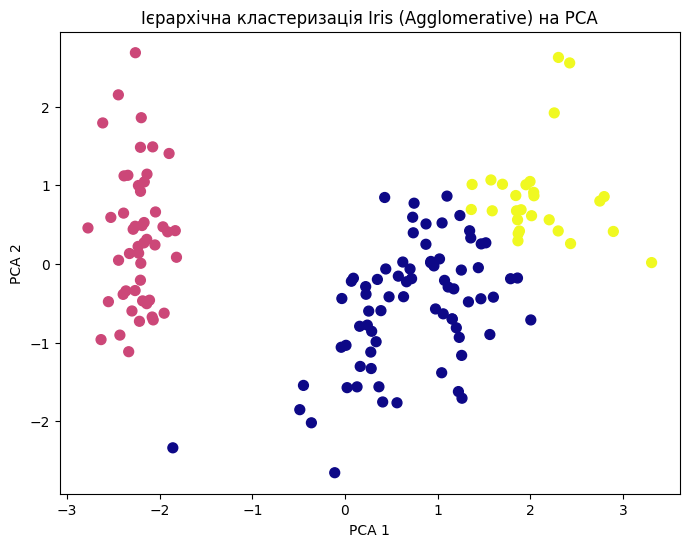

In [ ]:
plt.figure(figsize=(8,6))
plt.scatter(X_pca_3d[:,0], X_pca_3d[:,1],
            c=df['agg_pca_cluster'], cmap='plasma', s=50)
plt.title("Ієрархічна кластеризація Iris (Agglomerative) на PCA")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.show()

**Крок 9** *Розрахуємо* оцінки якості моделі

In [ ]:
# Внутрішня метрика (використовуємо дані після PCA)
sil_score_agg_pca = silhouette_score(X_for_clustering, df['agg_pca_cluster'])
print(f"Silhouette Score (Agglomerative на PCA): {sil_score_agg_pca:.4f}")

# Зовнішня метрика (порівняння з реальними класами)
ari_score_agg_pca = adjusted_rand_score(df['species'], df['agg_pca_cluster'])
print(f"Adjusted Rand Index (Agglomerative на PCA): {ari_score_agg_pca:.4f}")

Silhouette Score (Agglomerative на PCA): 0.4604
Adjusted Rand Index (Agglomerative на PCA): 0.6304


**Крок 9** Побудуємо дендрограму для ієрархічної класифікації

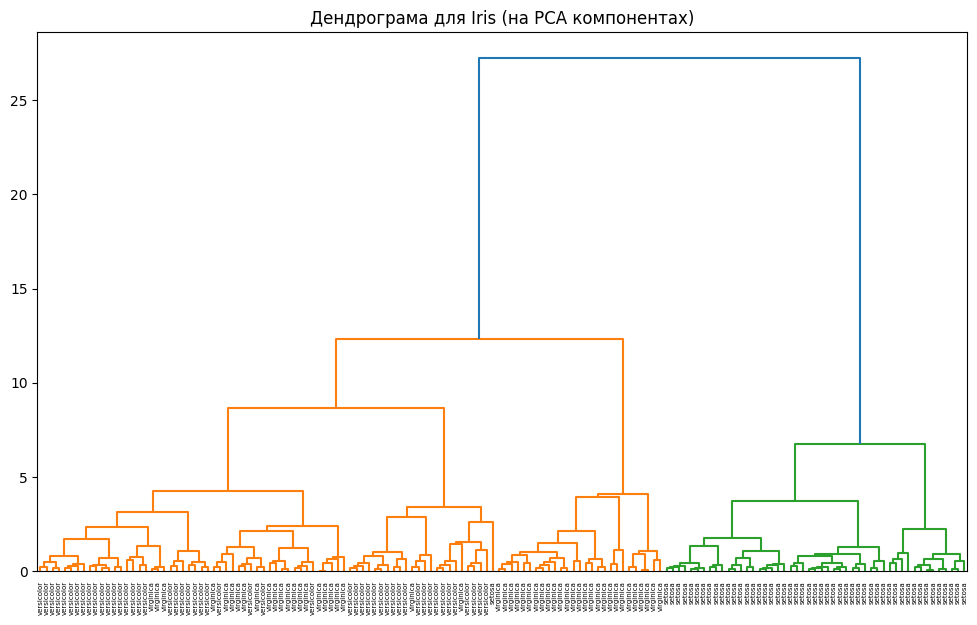

In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage

# Дендрограма будується на оригінальних даних, оскільки linkage працює краще на повних ознаках
# або на малій кількості компонент
linked_pca = linkage(X_for_clustering, method='ward')

plt.figure(figsize=(12,7))
dendrogram(linked_pca,
           orientation='top',
           labels=df['species'].values,
           distance_sort='descending',
           show_leaf_counts=True)
plt.title("Дендрограма для Iris (на PCA компонентах)")
plt.show() #

**Завдання для самостійного виконання**

Частина 1. Кластеризація методом DBSCAN

Виконайте кластеризацію датасету Iris за допомогою алгоритму DBSCAN.

Використайте параметри eps та min_samples.

Поясніть, як вони впливають на кількість кластерів і виділення «шуму».

Візуалізуйте результат у 2D (через PCA).

Позначте кластери різними кольорами.

Відмітьте точки, які DBSCAN класифікував як «шум» (label = -1).

Частина 2. Порівняння з іншими методами

Порівняйте результати DBSCAN з K‑Means та AgglomerativeClustering:

Скільки кластерів знайшов кожен метод?

Чи є точки, які DBSCAN вважає шумом, але інші методи віднесли до кластерів?

Обчисліть метрики якості:

Silhouette Score для кожного методу.

Якщо хочете — порівняйте з реальними класами через Adjusted Rand Index (ARI)

In [ ]:
#Тут має бути Ваш код


Тут мають бути Ваші висновки